## 1.5-Supervised-learning-algorithms-ANN - pt2
### The following script contains the following:

#### 1. Import data libraries, additional requirements
#### 2. Read unscaled data
        - Consistency checks
#### 3. Compare scaled vs unscaled data
        - Visual plot
#### 4. Split training/testing data sets
#### 5. Run ANN model
        - Check ANN model accuracy (training/test)
        - View confusion matrix
---------------------------------------------------------------------------------------------------------------------------

### 1. Import data libraries, additional requirements

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [6]:
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
path = r'ClimateWins'

---------------------------------------------------------------------------------------------------------------------------
### 2. Read unscaled/scaled data
        - Consistency checks

In [8]:
unscaled = pd.read_csv(os.path.join(path, '02 Data Sets', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
unscaled.head(5)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,...,5,0.88,1.00,0.45,0.34,0,4.70,8.50,6.00,10.90
1,19600102,1,6,2.10,0.84,1.02,0.36,1.05,0,1.10,...,7,0.91,1.00,0.25,0.84,0,0.70,8.90,5.60,12.10
2,19600103,1,8,2.10,0.90,1.02,0.18,0.30,0,0.00,...,7,0.91,1.01,0.17,0.08,0,0.10,10.50,8.10,12.90
3,19600104,1,3,2.10,0.92,1.02,0.58,0.00,0,4.10,...,7,0.86,1.02,0.13,0.98,0,0.00,7.40,7.30,10.60
4,19600105,1,6,2.10,0.95,1.02,0.65,0.14,0,5.40,...,3,0.80,1.03,0.46,0.00,0,5.70,5.70,3.00,8.40


In [9]:
# Reduce to just the mean temperatures
unscaled = unscaled[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']]

unscaled

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.50,3.70,2.40,9.30,10.00,10.60,7.90,-0.60,9.50,7.60,6.90,4.90,-5.90,4.20,8.50
1,19600102,1,6.10,2.90,2.30,7.70,8.20,6.10,7.70,2.10,8.60,9.80,6.20,3.40,-9.50,4.00,8.90
2,19600103,1,8.50,3.10,2.70,6.80,7.10,8.40,6.50,4.60,6.90,8.60,5.80,1.90,-9.50,2.40,10.50
3,19600104,1,6.30,2.00,2.00,6.70,6.80,9.40,5.80,3.20,7.00,10.30,3.90,3.00,-11.50,1.20,7.40
4,19600105,1,3.00,2.00,2.50,8.00,7.70,8.90,5.40,3.60,8.10,12.10,1.80,3.70,-9.30,3.30,5.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,15.90,18.20,11.70,15.70,17.80,16.40,9.10,14.70,18.60,20.00,14.30,9.70,0.60,11.50,10.70
22946,20221028,10,16.70,15.90,11.70,16.00,19.40,15.80,9.10,12.90,18.90,19.10,16.10,10.90,2.30,12.50,10.70
22947,20221029,10,16.70,13.40,11.70,15.80,18.20,16.50,9.10,13.20,18.20,19.00,17.40,9.70,3.30,13.10,10.70
22948,20221030,10,15.40,15.00,11.70,14.40,16.70,15.20,9.10,14.00,16.30,15.70,14.50,5.90,3.40,7.50,10.70


In [10]:
# Export unscaled_temp_means
unscaled.to_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'unscaled_temp_mean.csv'), index=False)

In [11]:
# Read scaled data
scaled = pd.read_csv(os.path.join(path, '02 Data Sets', 'Supervised', 'scaled_temp_mean_new.csv'))
scaled

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.53,-1.02,-1.10,-0.11,-0.11,-0.11,-0.18,-1.37,-0.10,-0.99,-0.27,-0.19,-0.12,-0.39,-0.67
1,19600102,1,-0.58,-1.11,-1.11,-0.37,-0.37,-0.89,-0.21,-1.04,-0.23,-0.69,-0.35,-0.37,-0.65,-0.42,-0.55
2,19600103,1,-0.26,-1.08,-1.06,-0.51,-0.53,-0.49,-0.39,-0.74,-0.49,-0.85,-0.40,-0.55,-0.65,-0.62,-0.07
3,19600104,1,-0.56,-1.21,-1.15,-0.53,-0.58,-0.32,-0.49,-0.91,-0.47,-0.62,-0.64,-0.42,-0.94,-0.76,-1.00
4,19600105,1,-1.00,-1.21,-1.09,-0.32,-0.44,-0.40,-0.55,-0.86,-0.31,-0.38,-0.91,-0.33,-0.62,-0.50,-1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.75,0.63,-0.01,0.90,1.04,0.91,-0.01,0.48,1.27,0.68,0.66,0.40,0.83,0.52,-0.01
22946,20221028,10,0.86,0.37,-0.01,0.95,1.28,0.80,-0.01,0.26,1.31,0.56,0.89,0.54,1.07,0.64,-0.01
22947,20221029,10,0.86,0.08,-0.01,0.91,1.10,0.92,-0.01,0.30,1.21,0.55,1.05,0.40,1.22,0.72,-0.01
22948,20221030,10,0.68,0.27,-0.01,0.69,0.88,0.70,-0.01,0.40,0.92,0.10,0.69,-0.07,1.24,0.02,-0.01


In [12]:
# Read answers data
answers = pd.read_csv(os.path.join(path, '02 Data Sets', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))
answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---------------------------------------------------------------------------------------------------------------------------
### 3. Compare scaled vs unscaled data
        - Visual plot

In [13]:
# Create an 'X' matrix
X = unscaled.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [14]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [15]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [17]:
X_train[:10]

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
8196,20.40,22.50,22.50,16.30,18.80,15.80,17.10,19.20,17.70,24.80,19.10,10.50,2.30,8.50,15.60
20472,-1.80,-3.60,-3.30,-2.50,-3.60,1.30,9.10,-4.40,-3.80,5.80,-4.80,-11.20,-17.40,-6.90,10.70
18269,-1.80,3.20,-0.40,-4.90,-5.40,-2.80,-6.20,0.60,-6.10,2.10,-2.40,-14.40,-14.10,-8.30,1.00
7713,-1.40,0.70,1.50,0.20,-0.70,2.40,-2.90,-0.40,-1.00,2.30,-4.20,-6.50,-20.90,-2.20,6.80
21958,6.10,6.70,6.20,5.70,5.00,7.20,9.10,6.60,5.90,11.00,5.20,0.60,-14.70,1.00,10.70
11464,18.30,18.70,18.70,12.10,13.60,16.60,13.40,19.10,13.90,18.80,18.30,11.40,-2.60,10.00,13.10
3984,3.70,4.40,4.70,5.20,6.90,10.40,2.80,1.40,7.00,13.20,-2.00,-2.10,-2.60,1.10,10.90
4752,-3.90,0.50,2.10,2.30,2.30,8.80,0.00,0.80,3.20,6.50,-2.10,-0.40,-10.30,1.30,10.50
11092,15.70,21.30,20.60,13.50,16.00,17.30,13.80,18.30,14.80,19.20,14.50,12.80,-0.70,11.90,12.60
21377,18.80,23.60,21.60,19.00,20.40,19.40,9.10,19.60,20.30,26.80,18.20,21.50,4.40,20.00,10.70


In [18]:
# Scaling the data
scaler = StandardScaler()

# Fit the train data
scaler.fit(X_train)

# Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11408523  1.26048221  0.98510239  1.18267178  0.79366897
   1.16696642  1.02406684  1.12530567  1.32713725  1.26235516  0.49003378
   1.0719053   0.14041372  1.45475014]
 [-1.65254457 -1.84706463 -1.77256635 -1.98055572 -2.10946465 -1.72667839
  -0.01359355 -1.83095876 -2.09029531 -1.23266439 -1.73566519 -2.14158559
  -1.80450767 -1.77299837 -0.0139084 ]
 [-1.65254457 -1.07557731 -1.43164228 -2.35915038 -2.37401133 -2.43932834
  -2.27141449 -1.22608045 -2.43428984 -1.73115208 -1.43460876 -2.5296585
  -1.322672   -1.94694492 -2.92125284]
 [-1.59839734 -1.35921235 -1.20827824 -1.55463674 -1.68325056 -1.53547963
  -1.78443351 -1.34705611 -1.67151937 -1.7042068  -1.66040109 -1.57160352
  -2.31554551 -1.18903494 -1.1828407 ]
 [-0.58313666 -0.67848825 -0.65574614 -0.68702399 -0.84551941 -0.70115774
  -0.01359355 -0.50022649 -0.6395358  -0.5320871  -0.48126337 -0.71056677
  -1.41027848 -0.79144282 -0.0139084 ]
 [ 1.06835403  0.68295996  0.81375413  0.32256175  0.41842582  0.9

In [19]:
# Note the features all have a mean of zero and a standard deviation of one.

In [20]:
# Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

<Axes: title={'center': 'After Scaling'}, xlabel='BASEL_temp_mean', ylabel='Density'>

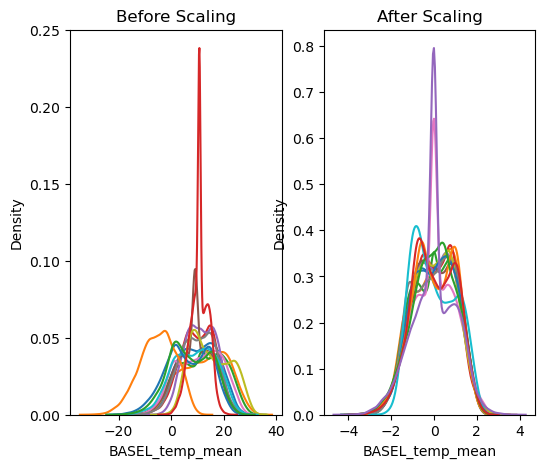

In [21]:
# Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BELGRADE_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BUDAPEST_temp_mean'], ax=ax1)
sns.kdeplot(X_train['DEBILT_temp_mean'], ax=ax1)
sns.kdeplot(X_train['HEATHROW_temp_mean'], ax=ax1)
sns.kdeplot(X_train['KASSEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['LJUBLJANA_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MAASTRICHT_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MADRID_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MUNCHENB_temp_mean'], ax=ax1)
sns.kdeplot(X_train['OSLO_temp_mean'], ax=ax1)
sns.kdeplot(X_train['SONNBLICK_temp_mean'], ax=ax1)
sns.kdeplot(X_train['STOCKHOLM_temp_mean'], ax=ax1)
sns.kdeplot(X_train['VALENTIA_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BELGRADE_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BUDAPEST_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DEBILT_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DUSSELDORF_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['HEATHROW_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['KASSEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['LJUBLJANA_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MAASTRICHT_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MADRID_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MUNCHENB_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['OSLO_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['SONNBLICK_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['STOCKHOLM_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['VALENTIA_temp_mean'], ax=ax2)

**NOTE:** Doesnt seem to be a significant difference between scaled and unscaled data, the unscaled data might be preferred, as it has less density than the scaled eather data.

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------
### 3. Split training/testing data sets (scaled)

In [22]:
# Create an 'X' matrix
X = scaled.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [23]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [24]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


---------------------------------------------------------------------------------------------------------------------------
### 4. Run ANN model
        - Check ANN model accuracy (training/test)
        - View confusion matrix

In [26]:
# Create the ANN
# hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [27]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

0.44120381129444575
0.44614848379226213


array([[[3938,  400],
        [ 507,  893]],

       [[3191,  585],
        [ 424, 1538]],

       [[3314,  586],
        [ 369, 1469]],

       [[4362,  275],
        [ 495,  606]],

       [[4150,  357],
        [ 563,  668]],

       [[4091,  479],
        [ 510,  658]],

       [[4591,  224],
        [ 495,  428]],

       [[3658,  537],
        [ 402, 1141]],

       [[4254,  308],
        [ 479,  697]],

       [[2751,  417],
        [ 269, 2301]],

       [[4250,  296],
        [ 491,  701]],

       [[4677,  202],
        [ 415,  444]],

       [[5738,    0],
        [   0,    0]],

       [[4539,  227],
        [ 457,  515]],

       [[5459,    3],
        [ 274,    2]]], dtype=int64)

In [28]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3938,  400], [ 507,  893]],
    [[3191,  585], [ 424, 1538]],
    [[3314,  586], [ 369, 1469]],
    [[4362,  275], [ 495,  606]],
    [[4150,  357], [ 563,  668]],
    [[4091,  479], [ 510,  658]],
    [[4591,  224], [ 495,  428]],
    [[3658,  537], [ 402, 1141]],
    [[4254,  308], [ 479,  697]],
    [[2751,  417], [ 269, 2301]],
    [[4250,  296], [ 491,  701]],
    [[4677,  202], [ 415,  444]],
    [[5738,    0], [   0,    0]],
    [[4539,  227], [ 457,  515]],
    [[5459,    3], [ 274,    2]]
]) #Change array

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

Accuracy scores for each group:
Group 1: 0.8419
Group 2: 0.8242
Group 3: 0.8336
Group 4: 0.8658
Group 5: 0.8397
Group 6: 0.8276
Group 7: 0.8747
Group 8: 0.8364
Group 9: 0.8628
Group 10: 0.8804
Group 11: 0.8628
Group 12: 0.8925
Group 13: 1.0000
Group 14: 0.8808
Group 15: 0.9517


In [29]:
# Use a multilabel confusion matrix to plot all 15 matrices at once
locations = list({x.split("_")[0] for x in scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

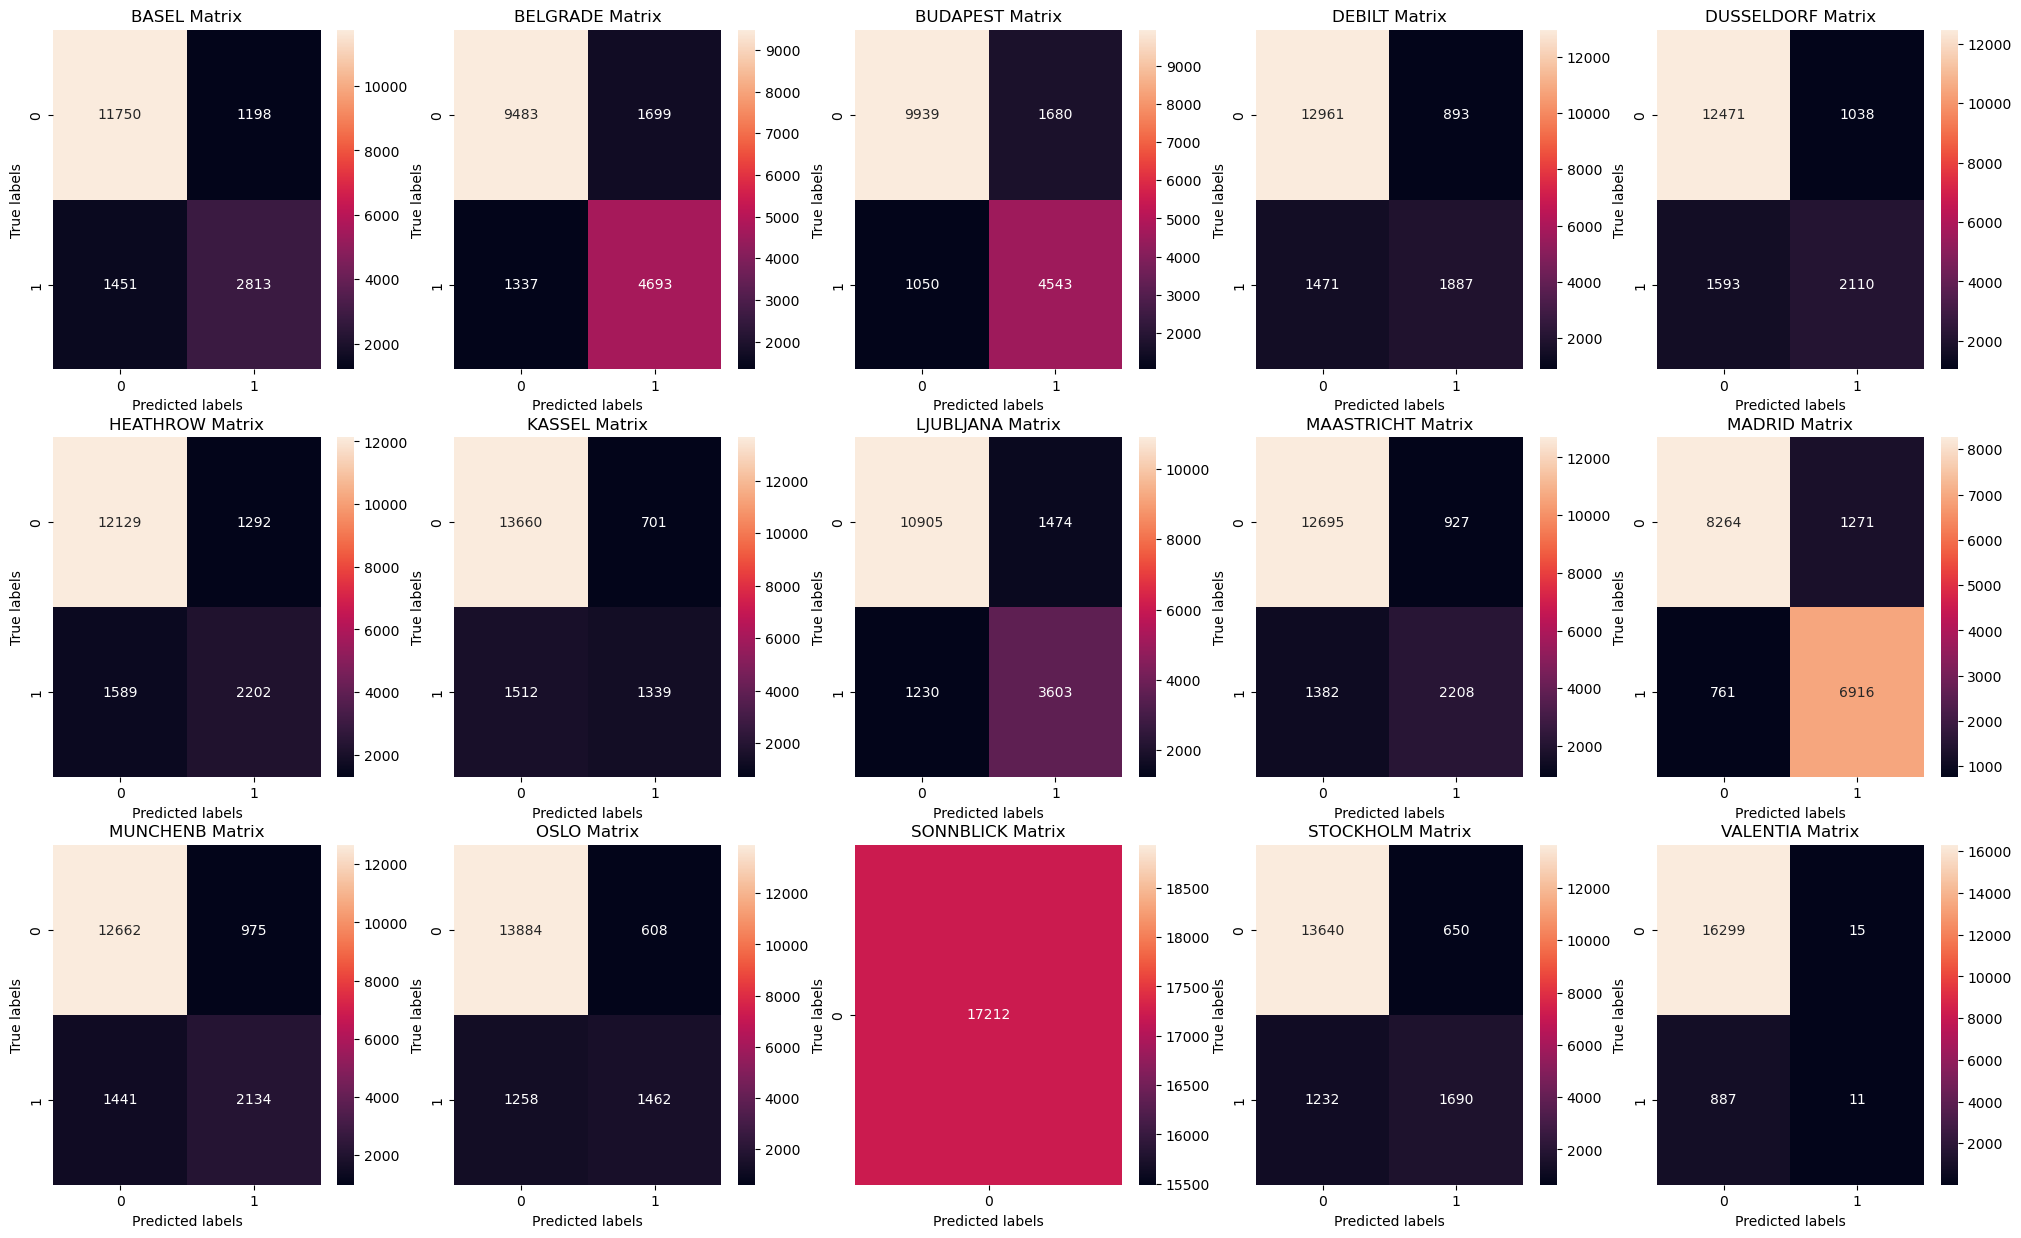

In [30]:
# Plot multilabel confusion matrix for (training accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data.
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

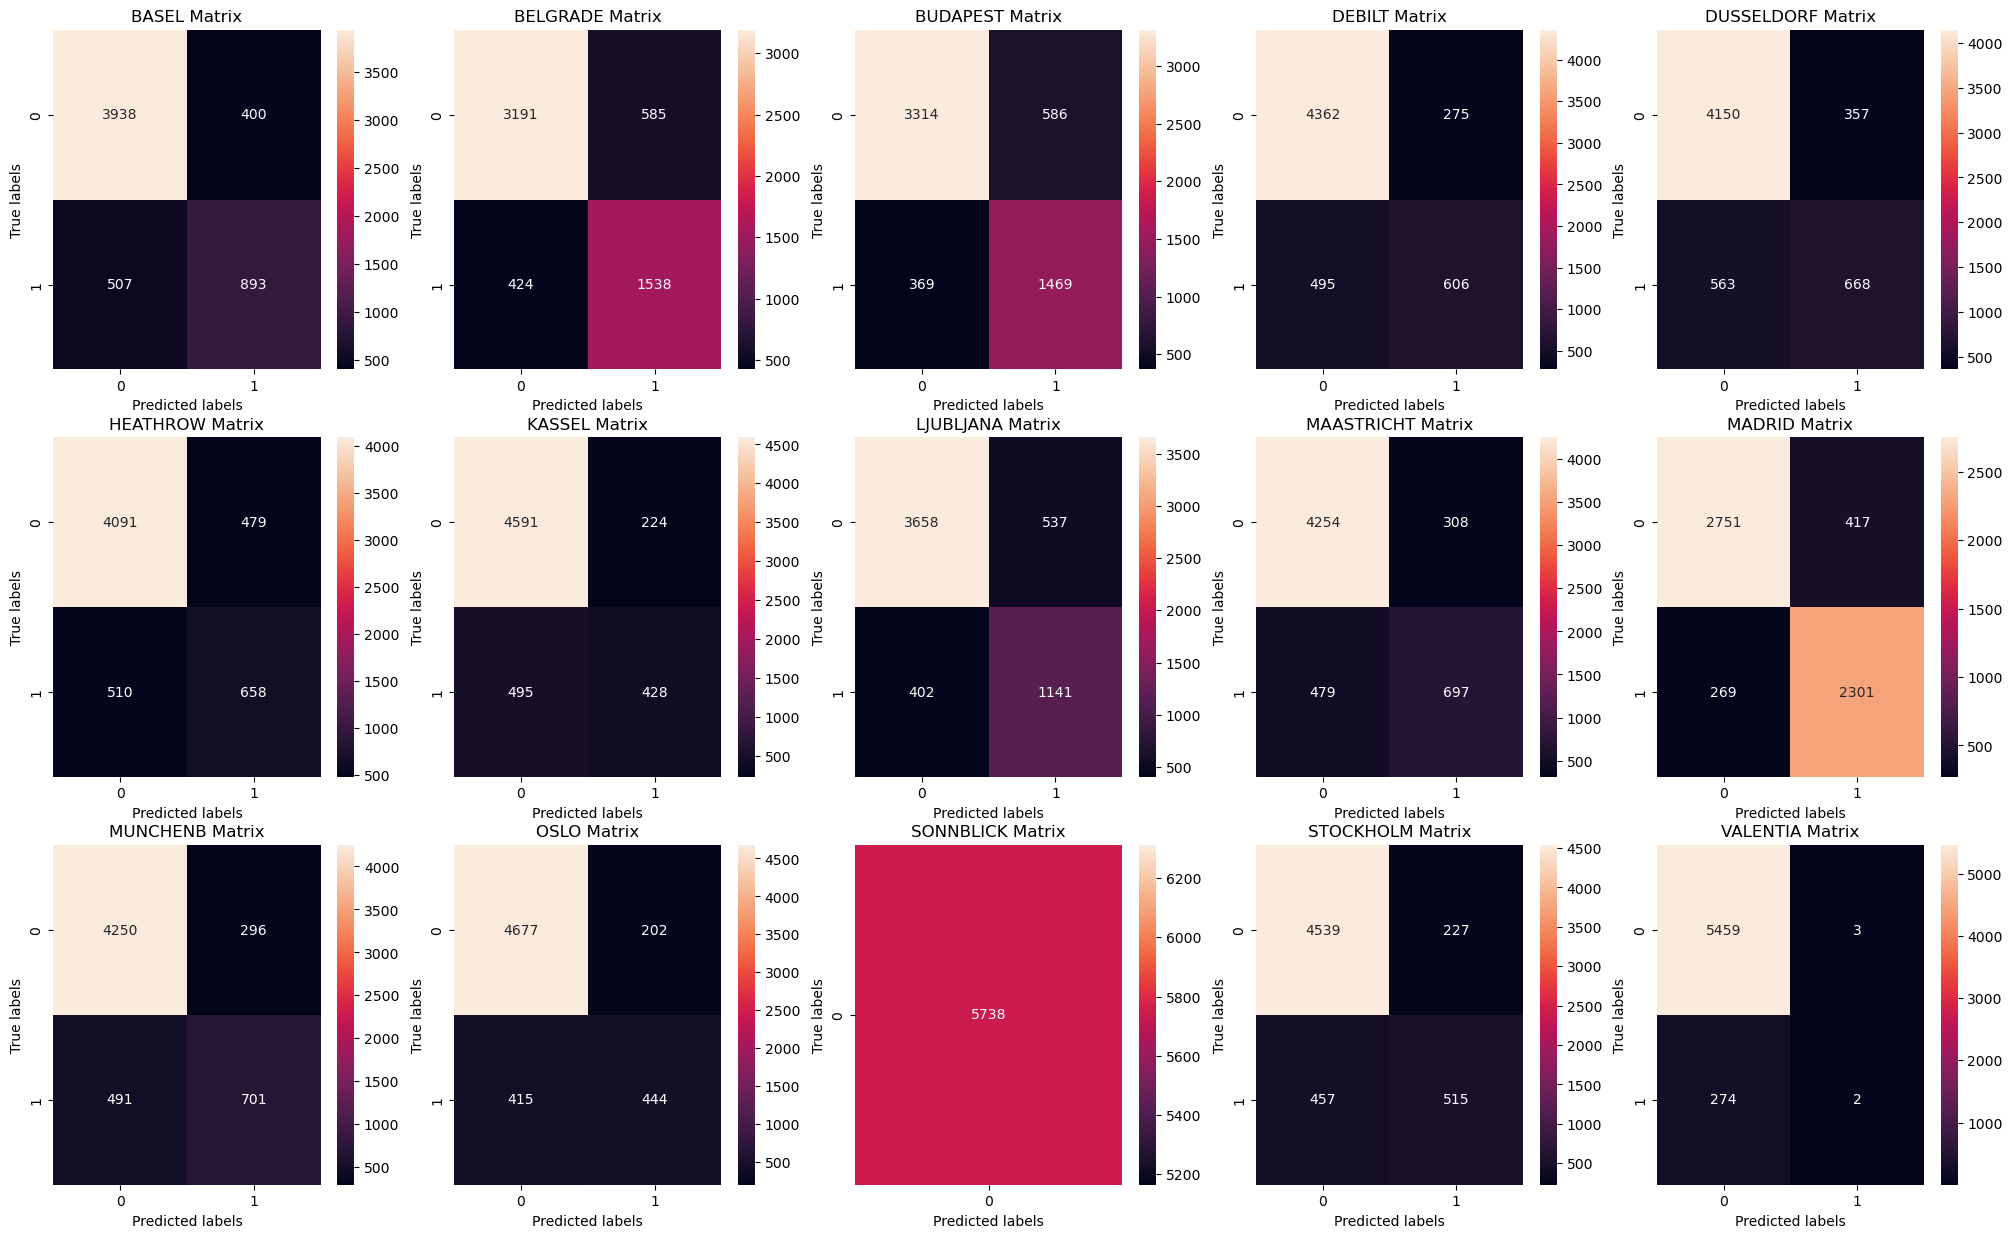

In [31]:
# Plot multilabel confusion matrix for (test accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

---------------------------------------------------------------------------------------------------------------------------
### 4. Run ANN model 2
        - Check ANN model accuracy (training/test)
        - View confusion matrix

In [32]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001) #increasing hidden layers
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [33]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

0.44637462235649544
0.4527710003485535


array([[[3924,  414],
        [ 456,  944]],

       [[3142,  634],
        [ 380, 1582]],

       [[3341,  559],
        [ 330, 1508]],

       [[4289,  348],
        [ 416,  685]],

       [[4087,  420],
        [ 504,  727]],

       [[4171,  399],
        [ 529,  639]],

       [[4551,  264],
        [ 350,  573]],

       [[3646,  549],
        [ 389, 1154]],

       [[4179,  383],
        [ 389,  787]],

       [[2739,  429],
        [ 210, 2360]],

       [[4184,  362],
        [ 392,  800]],

       [[4659,  220],
        [ 392,  467]],

       [[5738,    0],
        [   0,    0]],

       [[4541,  225],
        [ 404,  568]],

       [[5430,   32],
        [ 240,   36]]], dtype=int64)

In [34]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3924,  414],[ 456,  944]],
    [[3142,  634],[ 380, 1582]],
    [[3341,  559], [ 330, 1508]],
    [[4289,  348], [ 416,  685]],
    [[4087,  420], [ 504,  727]],
    [[4171,  399], [ 529,  639]],
    [[4551,  264], [ 350,  573]],
    [[3646,  549], [ 389, 1154]],
    [[4179,  383], [ 389,  787]],
    [[2739,  429], [ 210, 2360]],
    [[4184,  362], [ 392,  800]],
    [[4659,  220], [ 392,  467]],
    [[5738,    0], [   0,    0]],
    [[4541,  225], [ 404,  568]],
    [[5430,   32], [ 240,   36]]
]) #Change array

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

Accuracy scores for each group:
Group 1: 0.8484
Group 2: 0.8233
Group 3: 0.8451
Group 4: 0.8669
Group 5: 0.8390
Group 6: 0.8383
Group 7: 0.8930
Group 8: 0.8365
Group 9: 0.8655
Group 10: 0.8886
Group 11: 0.8686
Group 12: 0.8933
Group 13: 1.0000
Group 14: 0.8904
Group 15: 0.9526


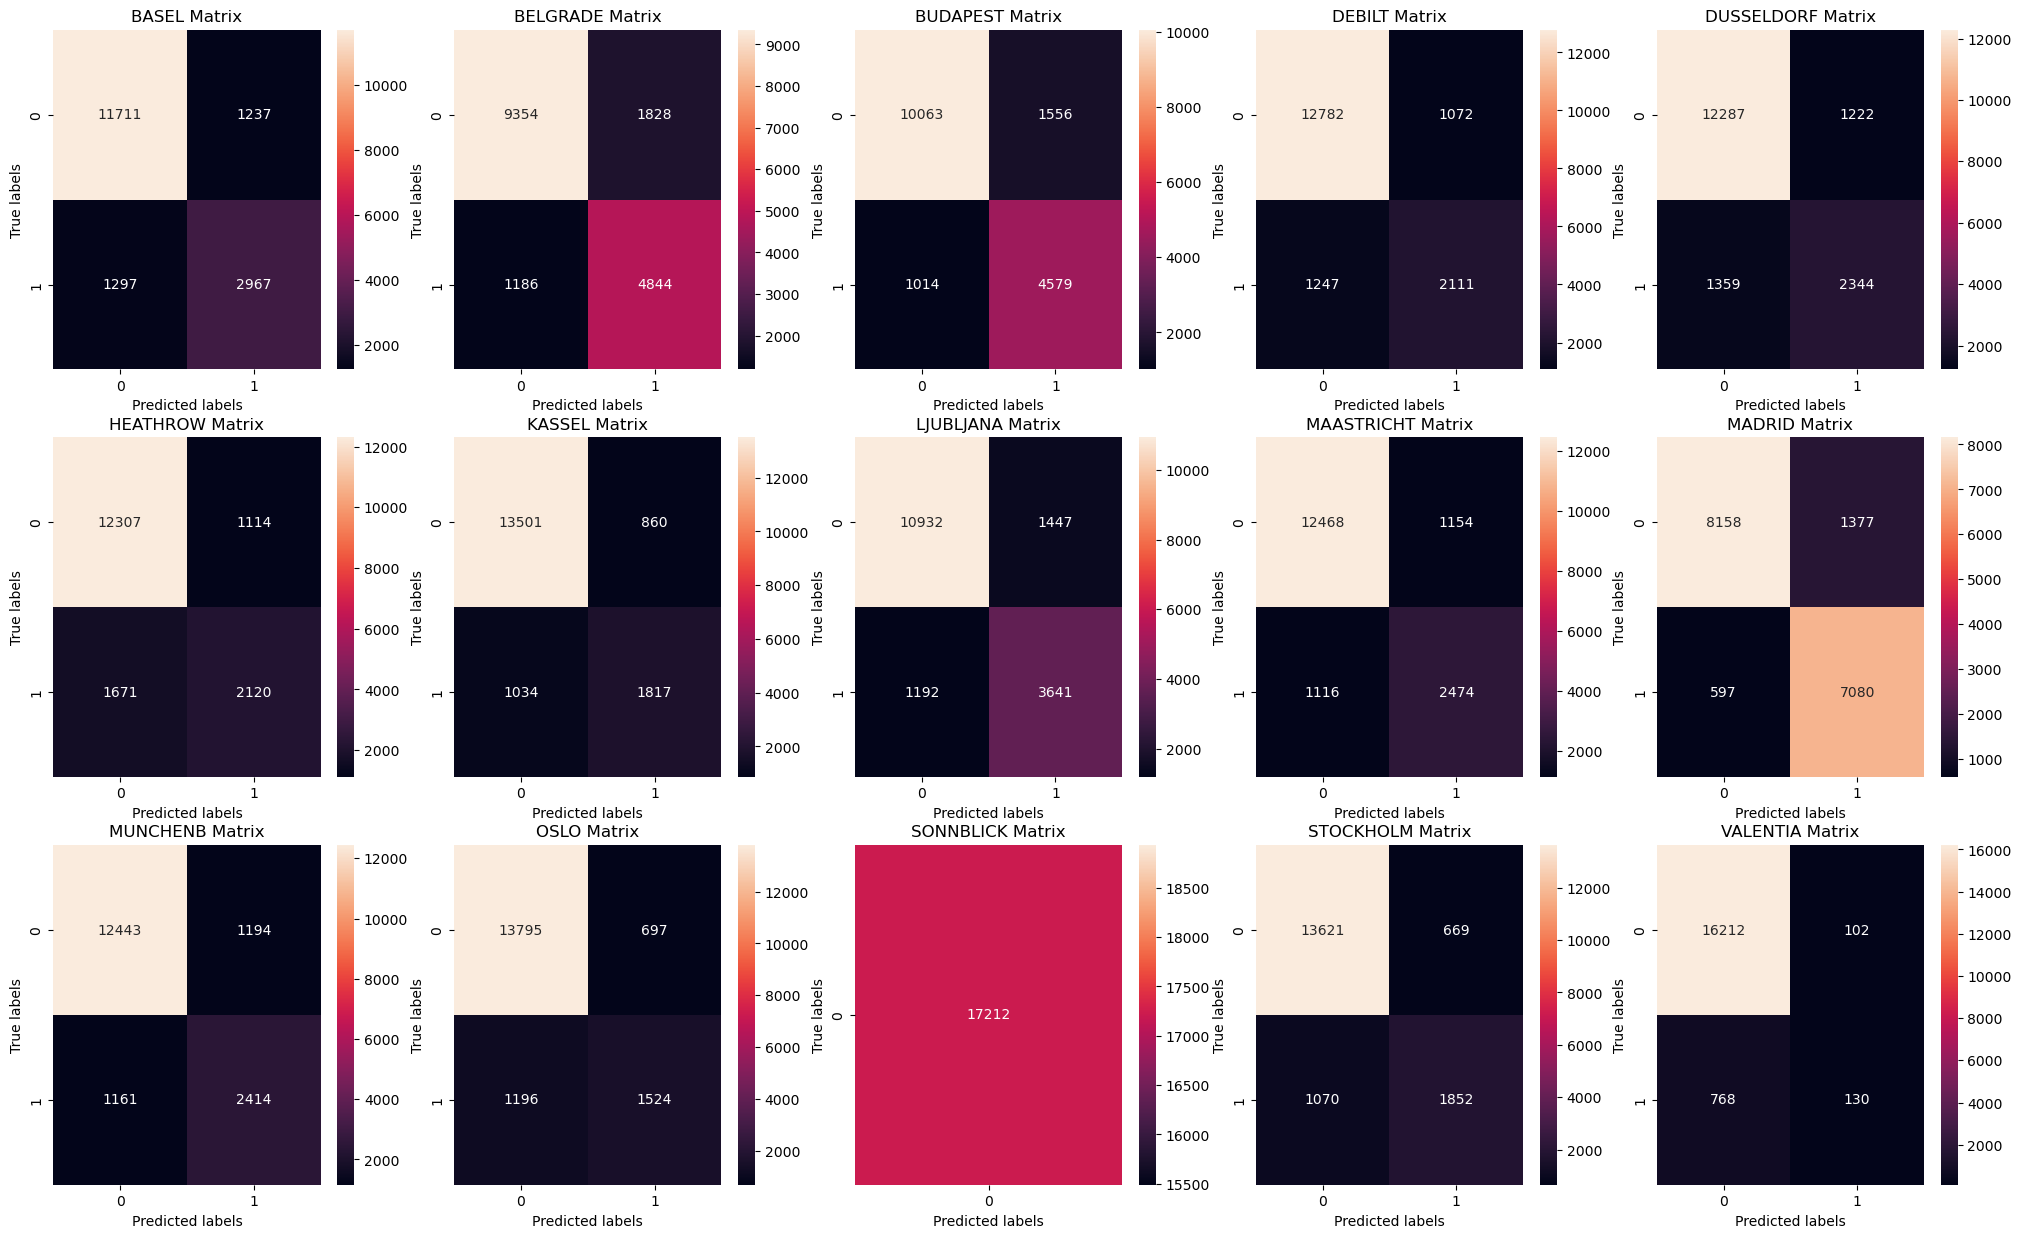

In [35]:
# Plot multilabel confusion matrix for (training accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

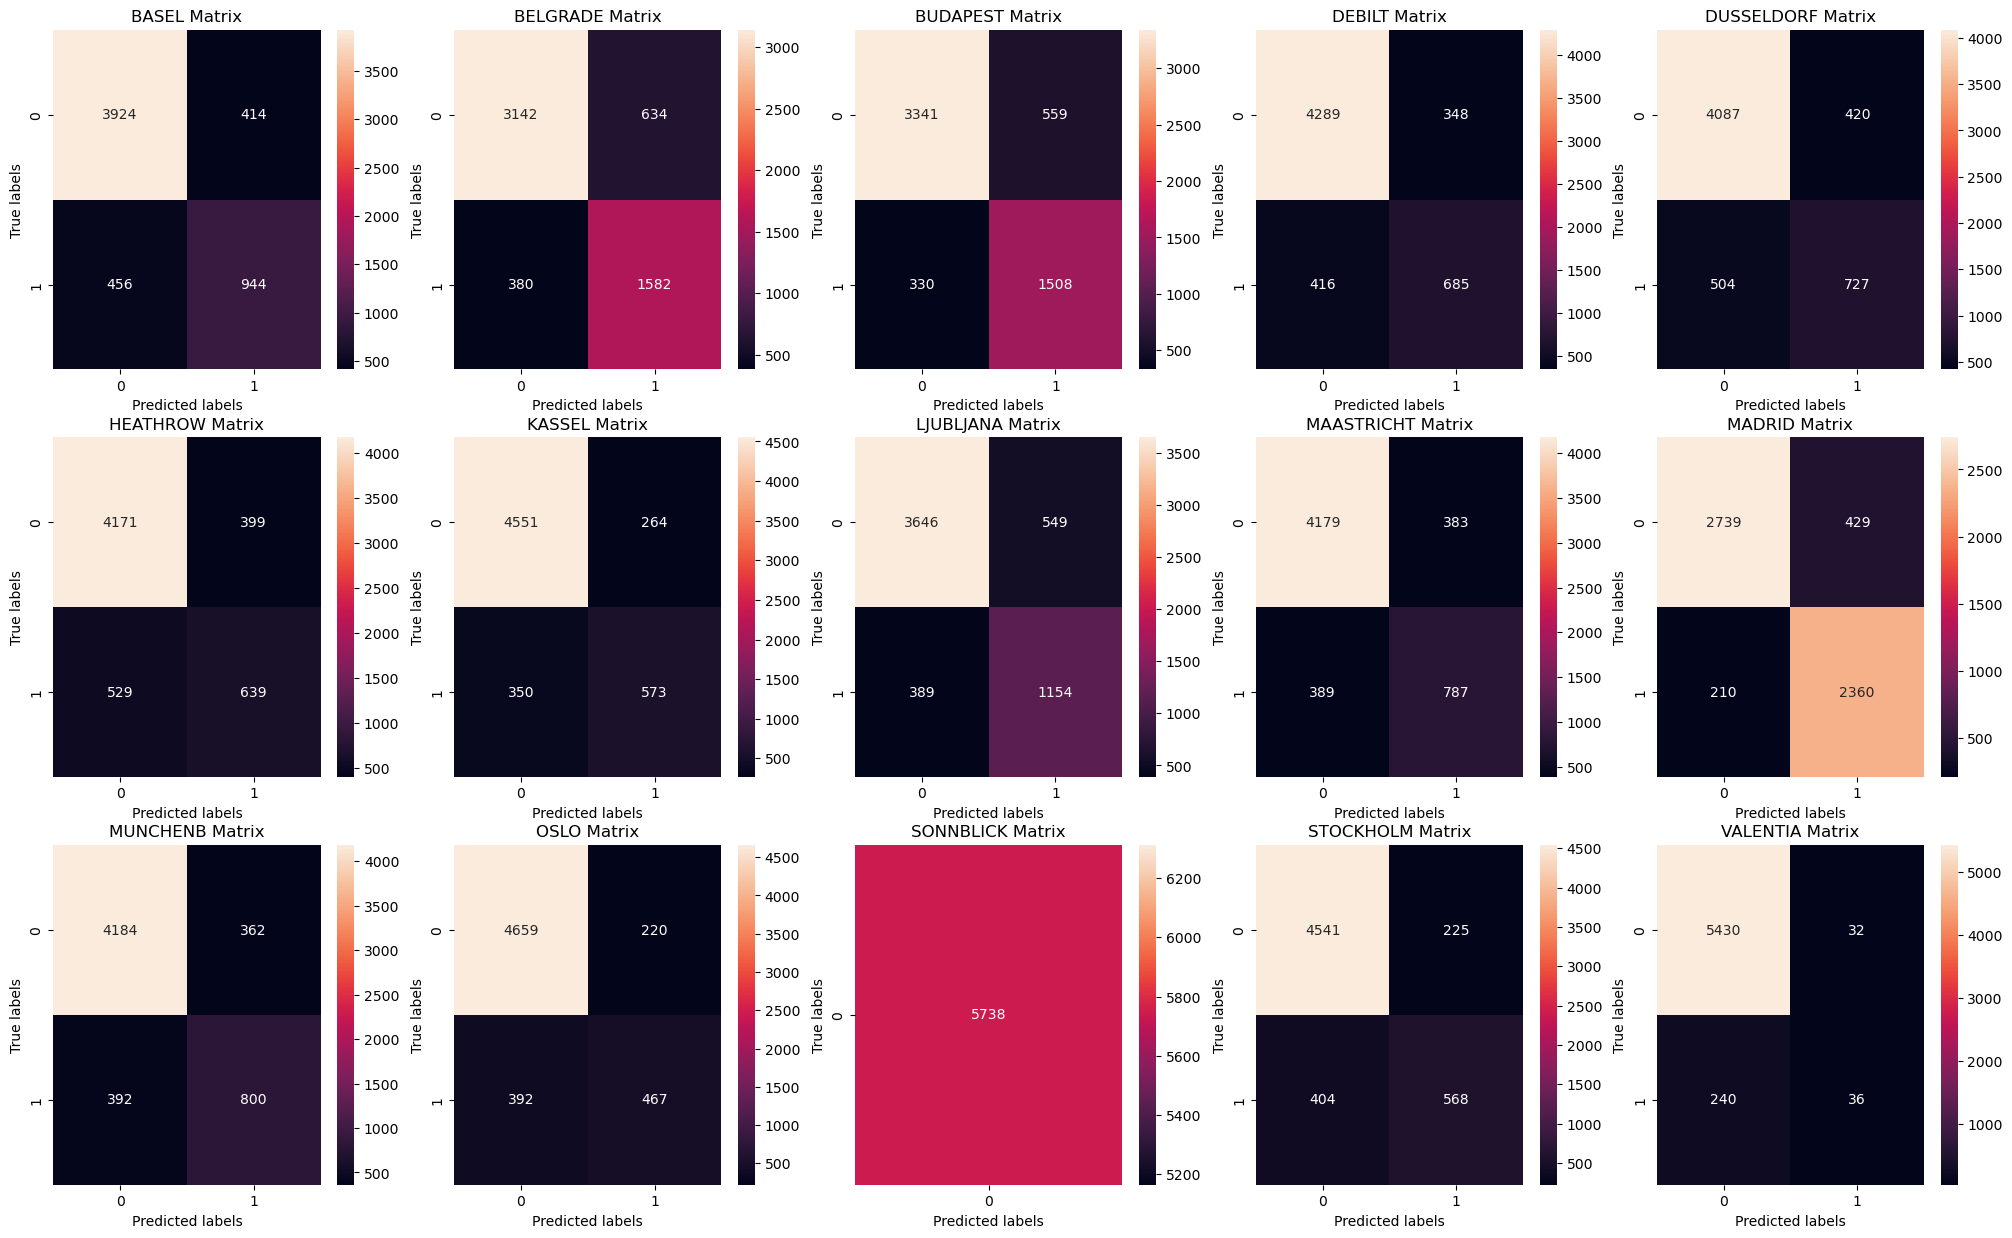

In [36]:
# Plot multilabel confusion matrix for (test accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

---------------------------------------------------------------------------------------------------------------------------
### 4. Run ANN model 3
        - Check ANN model accuracy (training/test)
        - View confusion matrix

In [37]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001) #increasing hidden layers and iterations
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [38]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

0.44945386939344645
0.45224817009410945


array([[[3934,  404],
        [ 445,  955]],

       [[3168,  608],
        [ 371, 1591]],

       [[3458,  442],
        [ 411, 1427]],

       [[4295,  342],
        [ 394,  707]],

       [[4104,  403],
        [ 437,  794]],

       [[4217,  353],
        [ 515,  653]],

       [[4563,  252],
        [ 321,  602]],

       [[3760,  435],
        [ 411, 1132]],

       [[4224,  338],
        [ 373,  803]],

       [[2740,  428],
        [ 209, 2361]],

       [[4185,  361],
        [ 364,  828]],

       [[4694,  185],
        [ 391,  468]],

       [[5738,    0],
        [   0,    0]],

       [[4521,  245],
        [ 351,  621]],

       [[5429,   33],
        [ 231,   45]]], dtype=int64)

In [40]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3934,  404],[ 445,  955]],
    [[3168,  608],[ 371, 1591]],
    [[3458,  442],[ 411, 1427]],
    [[4295,  342],[ 394,  707]],
    [[4104,  403],[ 437,  794]],
    [[4217,  353],[ 515,  653]],
    [[4563,  252],[ 321,  602]],
    [[3760,  435],[ 411, 1132]],
    [[4224,  338],[ 373,  803]],
    [[2740,  428],[ 209, 2361]],
    [[4185,  361],[ 364,  828]],
    [[4694,  185],[ 391,  468]],
    [[5738,    0],[   0,    0]],
    [[4521,  245],[ 351,  621]],
    [[5429,   33],[ 231,   45]]
]) #Change array

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

Accuracy scores for each group:
Group 1: 0.8520
Group 2: 0.8294
Group 3: 0.8513
Group 4: 0.8717
Group 5: 0.8536
Group 6: 0.8487
Group 7: 0.9001
Group 8: 0.8526
Group 9: 0.8761
Group 10: 0.8890
Group 11: 0.8736
Group 12: 0.8996
Group 13: 1.0000
Group 14: 0.8961
Group 15: 0.9540


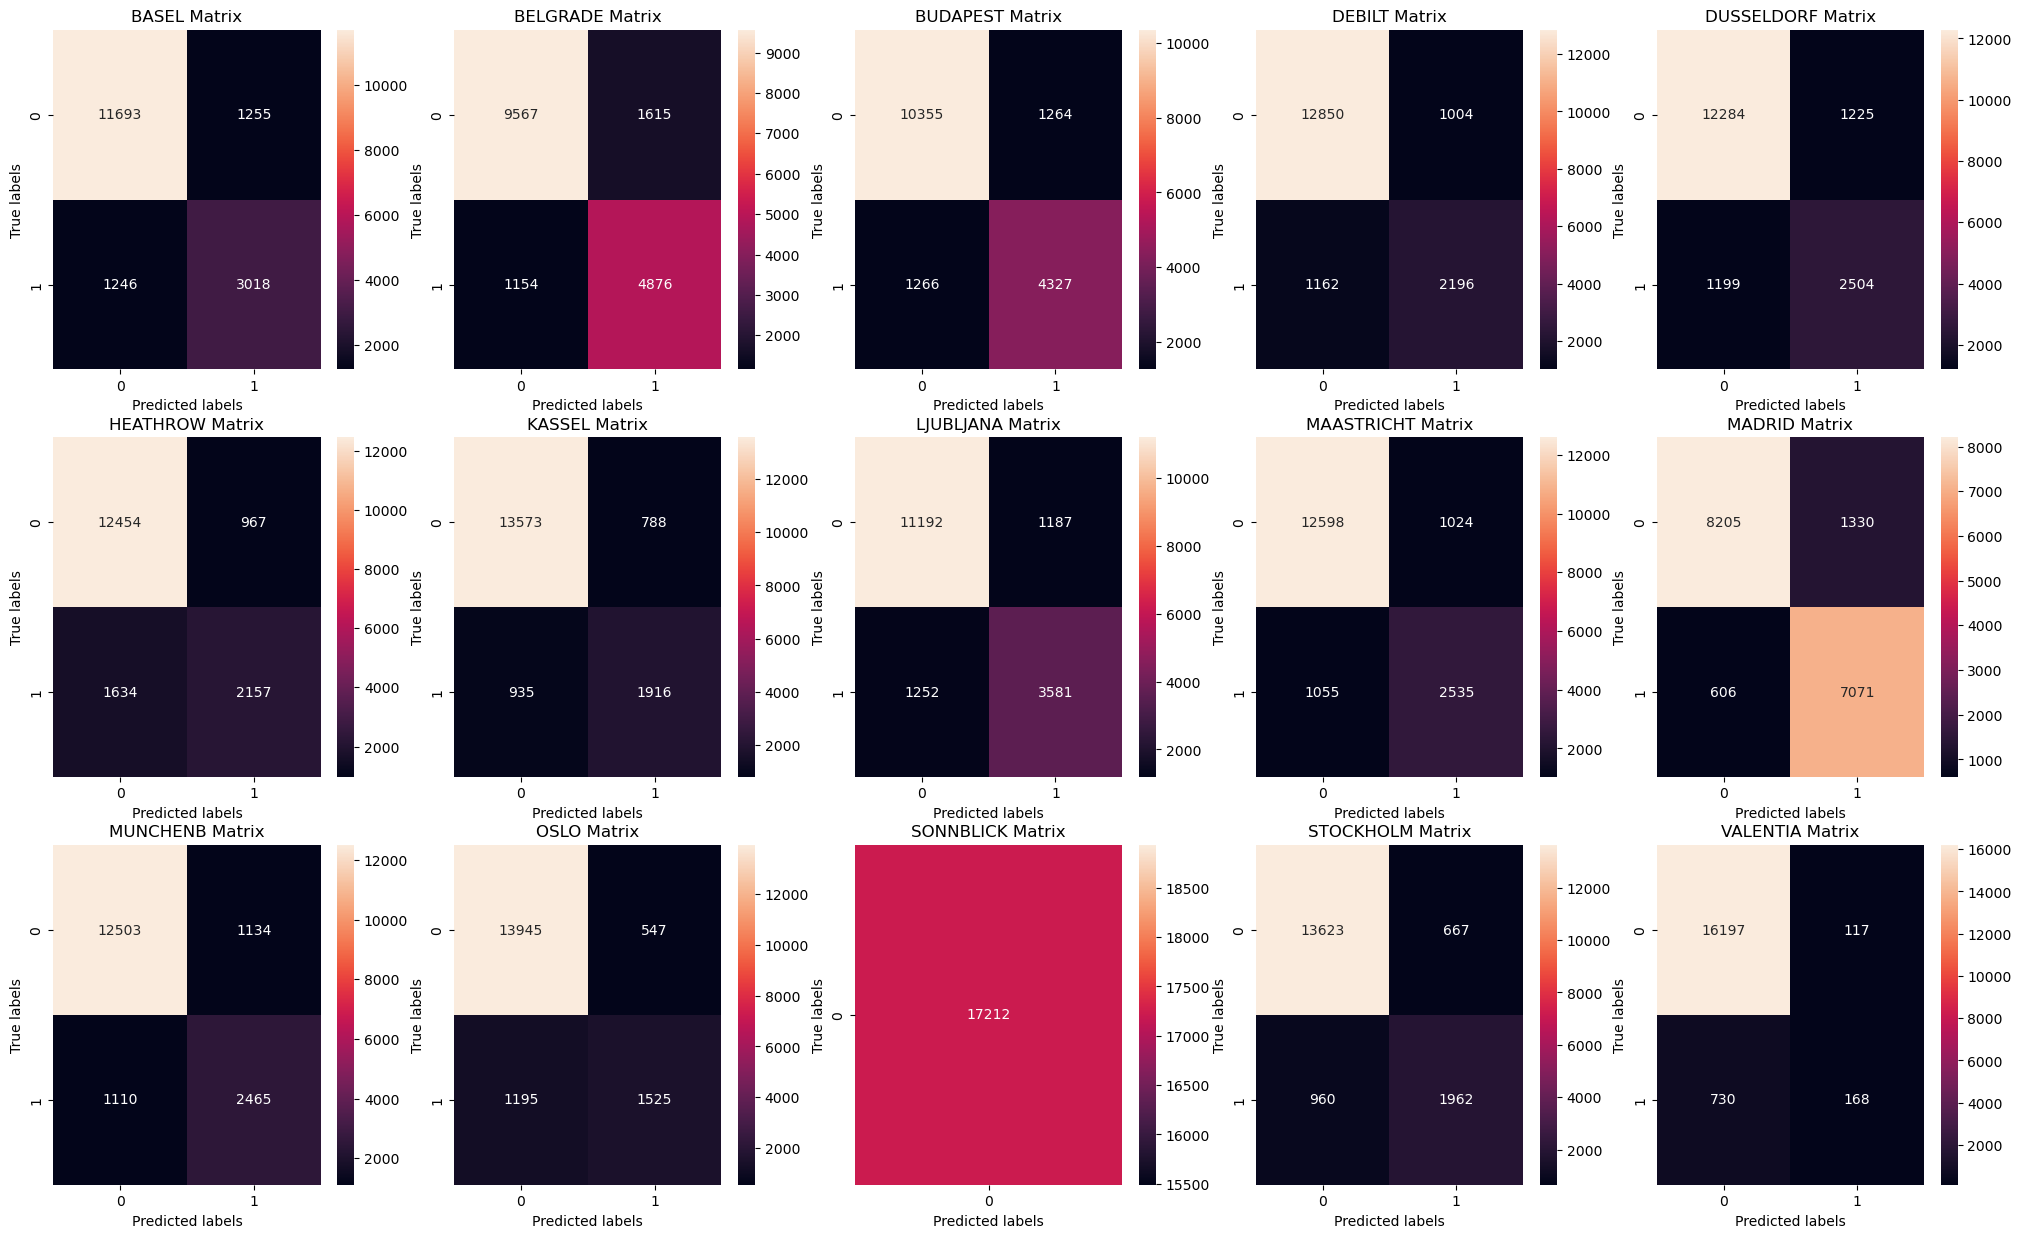

In [41]:
#P lot multilabel confusion matrix for (training accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

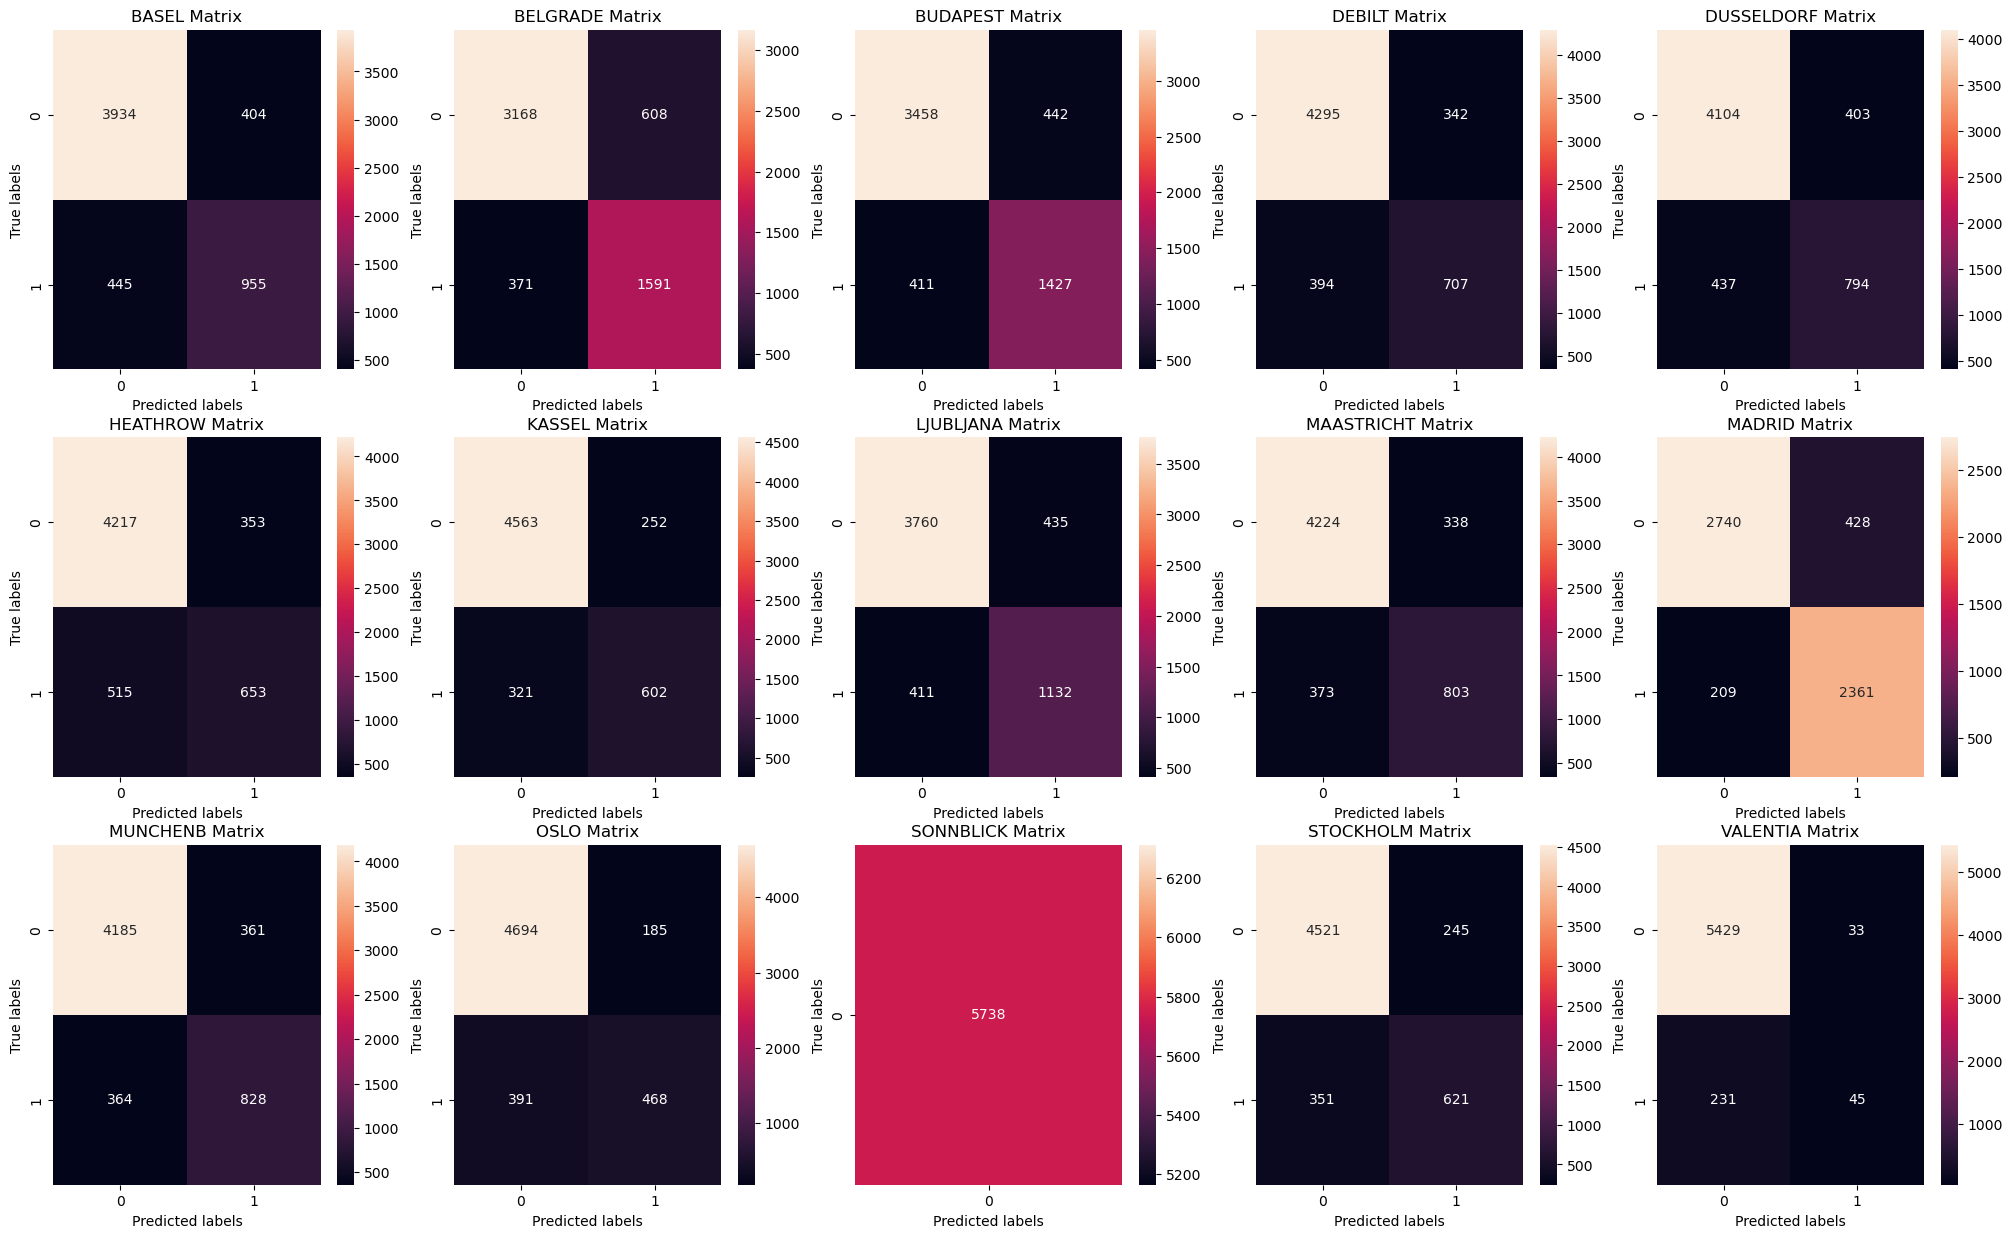

In [42]:
# Plot multilabel confusion matrix for (test accuracy score)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [43]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(30, 15, 15), max_iter=1200, tol=0.0001) #testing for plateau in data with increased parameters
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30, 15, 15), max_iter=1200)

In [44]:
# Check accuracy
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

0.4562514524750174
0.4567793656326246


array([[[3910,  428],
        [ 404,  996]],

       [[3210,  566],
        [ 318, 1644]],

       [[3450,  450],
        [ 319, 1519]],

       [[4260,  377],
        [ 360,  741]],

       [[4109,  398],
        [ 455,  776]],

       [[4083,  487],
        [ 397,  771]],

       [[4536,  279],
        [ 297,  626]],

       [[3699,  496],
        [ 293, 1250]],

       [[4197,  365],
        [ 351,  825]],

       [[2728,  440],
        [ 191, 2379]],

       [[4161,  385],
        [ 327,  865]],

       [[4595,  284],
        [ 250,  609]],

       [[5738,    0],
        [   0,    0]],

       [[4493,  273],
        [ 290,  682]],

       [[5385,   77],
        [ 204,   72]]], dtype=int64)

In [45]:
#Calculate and print accuracy score for each weather station (y_test)
confusion_matrices = np.array([
    [[3910,  428],[ 404,  996]],
    [[3210,  566],[ 318, 1644]],
    [[3450,  450],[ 319, 1519]],
    [[4260,  377],[ 360,  741]],
    [[4109,  398],[ 455,  776]],
    [[4083,  487],[ 397,  771]],
    [[4536,  279],[ 297,  626]],
    [[3699,  496],[ 293, 1250]],
    [[4197,  365],[ 351,  825]],
    [[2728,  440],[ 191, 2379]],
    [[4161,  385],[ 327,  865]],
    [[4595,  284],[ 250,  609]],
    [[5738,    0],[   0,    0]],
    [[4493,  273],[ 290,  682]],
    [[5385,   77],[ 204,   72]]
]) #Change array

accuracy_scores = []

for matrix in confusion_matrices:
    tn, fp = matrix[0]
    fn, tp = matrix[1]
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    accuracy_scores.append(accuracy)

print("Accuracy scores for each group:")
for i, accuracy in enumerate(accuracy_scores):
    print(f"Group {i + 1}: {accuracy:.4f}")

Accuracy scores for each group:
Group 1: 0.8550
Group 2: 0.8459
Group 3: 0.8660
Group 4: 0.8716
Group 5: 0.8513
Group 6: 0.8459
Group 7: 0.8996
Group 8: 0.8625
Group 9: 0.8752
Group 10: 0.8900
Group 11: 0.8759
Group 12: 0.9069
Group 13: 1.0000
Group 14: 0.9019
Group 15: 0.9510


---------------------------------------------------------------------------------------------------------------------------
**NOTE:** Overall, the model has a low accuracy score avg.
- Among the three models, ANN Model 3 performs the best in terms of accuracy.
   - Increasing the complexity of the model architecture (adding more hidden layers and neurons) tends to improve performance, as seen from the trend of increasing accuracy scores from Model 1 to Model 3.
- When the model achieves similar scores with slight improvement, it suggests that the model is approaching a plateau in performance.
- In terms of individual weather stations, the model performs the best with VALENTIA (Group 15), as it has the highest accuracy score of all weather stations not accounting for SONNBLICK(Group 10), as there is only 'unpleasant' weather days for that weather station.

---------------------------------------------------------------------------------------------------------------------------